In [1]:
#your code here

import numpy as n
import pandas as p
import seaborn as s
import matplotlib.pyplot as plt
s.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [2]:
x = p.read_csv("survey lung cancer.csv")

In [3]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
x.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [6]:
x.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

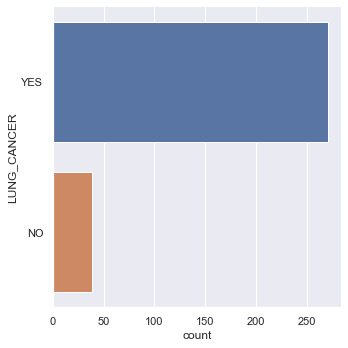

In [7]:
s.catplot(y = "LUNG_CANCER",data = x, kind = "count")

In [8]:
from sklearn.utils import resample

yesca = x[x.LUNG_CANCER == 'YES']
noc = x[x.LUNG_CANCER == 'NO']
 
noc_up = resample(noc, 
                        replace=True,                    
                        n_samples=yesca.shape[0])    
 
y = p.concat([yesca, noc_up])
 
y['LUNG_CANCER'].value_counts()


YES    270
NO     270
Name: LUNG_CANCER, dtype: int64

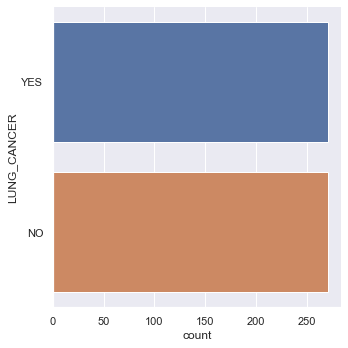

In [9]:
s.catplot(y = "LUNG_CANCER",data = y, kind = "count")

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y['LUNG_CANCER']=le.fit_transform(y['LUNG_CANCER'])
y['GENDER']=le.fit_transform(y['GENDER'])
y['LUNG_CANCER']=le.fit_transform(y['LUNG_CANCER'])
y['SMOKING']=le.fit_transform(y['SMOKING'])
y['YELLOW_FINGERS']=le.fit_transform(y['YELLOW_FINGERS'])
y['ANXIETY']=le.fit_transform(y['ANXIETY'])
y['PEER_PRESSURE']=le.fit_transform(y['PEER_PRESSURE'])
y['CHRONIC DISEASE']=le.fit_transform(y['CHRONIC DISEASE'])
y['FATIGUE ']=le.fit_transform(y['FATIGUE '])
y['ALLERGY ']=le.fit_transform(y['ALLERGY '])
y['WHEEZING']=le.fit_transform(y['WHEEZING'])
y['ALCOHOL CONSUMING']=le.fit_transform(y['ALCOHOL CONSUMING'])
y['COUGHING']=le.fit_transform(y['COUGHING'])
y['SHORTNESS OF BREATH']=le.fit_transform(y['SHORTNESS OF BREATH'])
y['SWALLOWING DIFFICULTY']=le.fit_transform(y['SWALLOWING DIFFICULTY'])
y['CHEST PAIN']=le.fit_transform(y['CHEST PAIN'])


In [11]:
y.head(400)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1,68,0,0,1,1,1,0,0,0,1,0,0,0,0,0
245,1,59,0,0,0,1,0,1,0,1,0,0,1,0,1,0
32,1,56,1,1,1,0,0,0,0,0,0,0,1,1,0,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 221
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 540 non-null    int32
 1   AGE                    540 non-null    int64
 2   SMOKING                540 non-null    int64
 3   YELLOW_FINGERS         540 non-null    int64
 4   ANXIETY                540 non-null    int64
 5   PEER_PRESSURE          540 non-null    int64
 6   CHRONIC DISEASE        540 non-null    int64
 7   FATIGUE                540 non-null    int64
 8   ALLERGY                540 non-null    int64
 9   WHEEZING               540 non-null    int64
 10  ALCOHOL CONSUMING      540 non-null    int64
 11  COUGHING               540 non-null    int64
 12  SHORTNESS OF BREATH    540 non-null    int64
 13  SWALLOWING DIFFICULTY  540 non-null    int64
 14  CHEST PAIN             540 non-null    int64
 15  LUNG_CANCER            540 non-null    i

<AxesSubplot:xlabel='AGE', ylabel='LUNG_CANCER'>

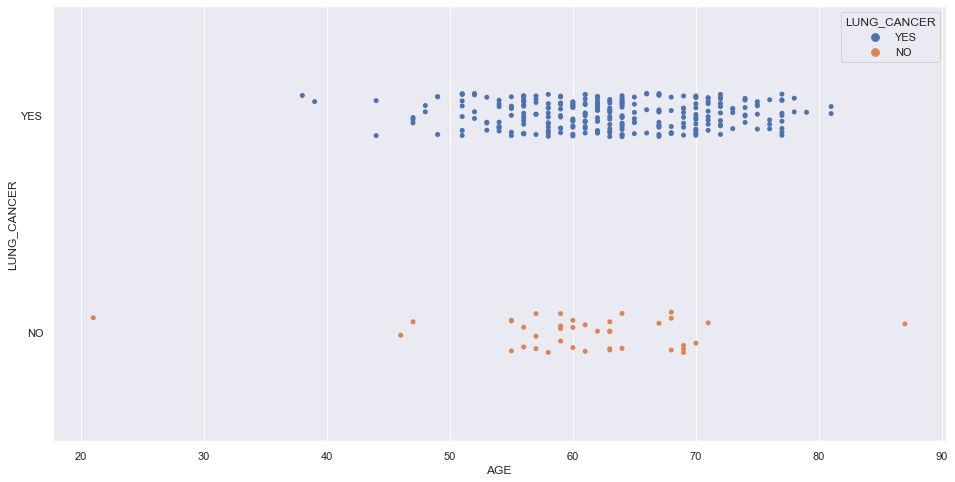

In [13]:
f = plt.figure(figsize=(16, 8))
s.stripplot(x = 'AGE', y = 'LUNG_CANCER', data = x,hue='LUNG_CANCER')

In [14]:
k_best = SelectKBest(score_func=chi2, k=11)  

X_new = k_best.fit_transform(p.DataFrame(y[['COUGHING','ALCOHOL CONSUMING','WHEEZING','ALLERGY ','SWALLOWING DIFFICULTY','GENDER','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','CHEST PAIN','SMOKING']]) , p.DataFrame(y['LUNG_CANCER']))

selected_indices = k_best.get_support(indices=True)

features=['COUGHING','ALCOHOL CONSUMING','WHEEZING','ALLERGY ','SWALLOWING DIFFICULTY','GENDER','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','CHEST PAIN','SMOKING']
selected_features = [features[i] for i in selected_indices]  

print("Best Suited Features:", selected_features)
print("\nFeatures and Their chi squared values\n")

for i in selected_features:
    chi2_stats,pval=chi2(p.DataFrame(y[i]),p.DataFrame(y['LUNG_CANCER']))
    print(i," :",int(chi2_stats))


Best Suited Features: ['COUGHING', 'ALCOHOL CONSUMING', 'WHEEZING', 'ALLERGY ', 'SWALLOWING DIFFICULTY', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'CHEST PAIN']

Features and Their chi squared values

COUGHING  : 30
ALCOHOL CONSUMING  : 55
WHEEZING  : 38
ALLERGY   : 89
SWALLOWING DIFFICULTY  : 76
YELLOW_FINGERS  : 19
ANXIETY  : 11
PEER_PRESSURE  : 23
CHRONIC DISEASE  : 9
FATIGUE   : 12
CHEST PAIN  : 21


In [15]:
def plot(col, df=y):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,5))

<AxesSubplot:xlabel='SWALLOWING DIFFICULTY'>

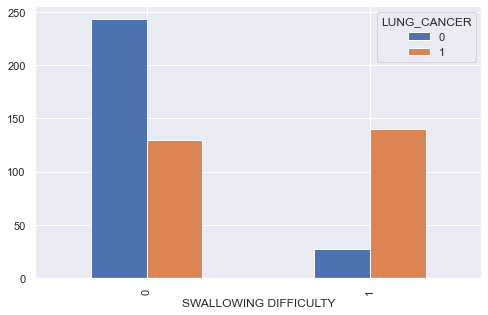

In [16]:
plot('SWALLOWING DIFFICULTY')

<AxesSubplot:xlabel='ALLERGY '>

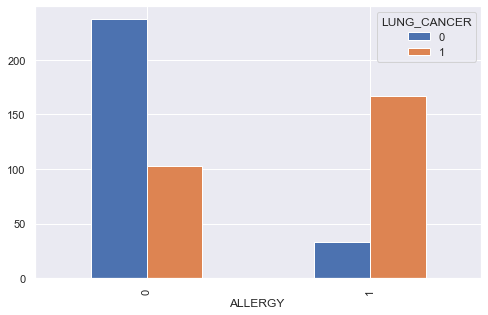

In [17]:
plot('ALLERGY ')

<AxesSubplot:xlabel='WHEEZING'>

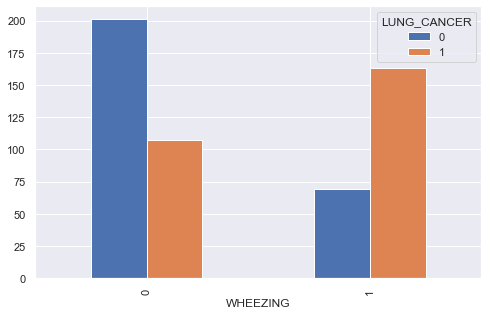

In [18]:
plot('WHEEZING')

<AxesSubplot:xlabel='ALCOHOL CONSUMING'>

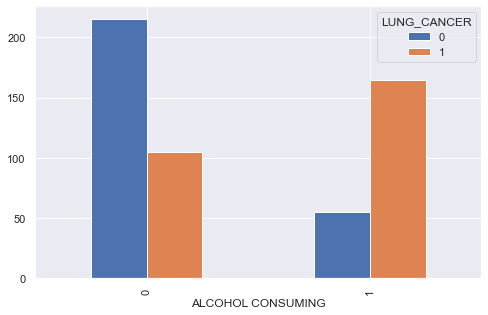

In [19]:
plot('ALCOHOL CONSUMING')

<AxesSubplot:xlabel='COUGHING'>

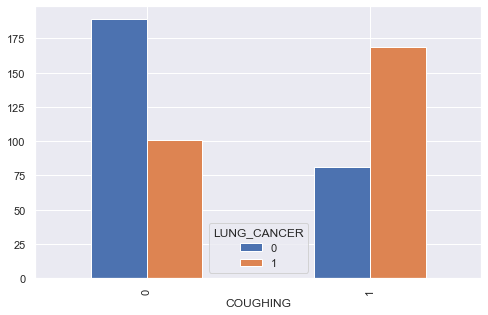

In [20]:
plot('COUGHING')

MODEL 1

Accuracy of model :  0.8580246913580247

TP: 67
TN: 72
FP: 17
FN: 6

True Positive Rate:	 0.9178082191780822


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


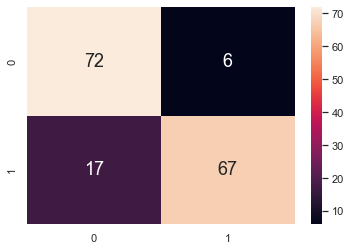

In [21]:
VAR = p.DataFrame(y[['COUGHING','ALCOHOL CONSUMING','WHEEZING','ALLERGY ','SWALLOWING DIFFICULTY']])   
LC = p.DataFrame(y['LUNG_CANCER'])         

X_train, X_test, y_train, y_test = train_test_split(VAR, LC, test_size = 0.3,random_state=2)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
q=accuracy_score(y_test,y_pred)
print("Accuracy of model : ",q)

f = plt.plot(figsize=(12, 4))
s.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18},)
conf_matrix = confusion_matrix(y_test, y_pred)

Model=confusion_matrix(y_test, y_pred)
TP=Model[1,1]

FP=Model[1,0]

TN=Model[0,0]

FN=Model[0,1]

print("\nTP:",TP)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)

print("\nTrue Positive Rate:\t",TP/(TP+FN))

MODEL 2

Accuracy of model :  0.8641975308641975

TP: 73
TN: 67
FP: 8
FN: 14

True Positive Rate:	 0.8390804597701149


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


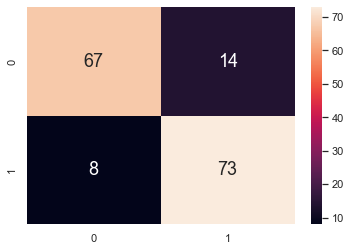

In [22]:
VAR_a = p.DataFrame(y[['ALCOHOL CONSUMING','ALLERGY ','SWALLOWING DIFFICULTY']])   
LC_a = p.DataFrame(y['LUNG_CANCER'])         

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(VAR_a, LC_a, test_size = 0.3,random_state=4)

model_a = LogisticRegression()
model_a.fit(X_train_a,y_train_a)

y_pred_a=model_a.predict(X_test_a)
q_a=accuracy_score(y_test_a,y_pred_a)
print("Accuracy of model : ",q_a)

f = plt.plot(figsize=(12, 4))
s.heatmap(confusion_matrix(y_test_a, y_pred_a), 
            annot = True, fmt=".0f", annot_kws={"size": 18},)
conf_matrix = confusion_matrix(y_test_a, y_pred_a)

Model_a=confusion_matrix(y_test_a, y_pred_a)
TP_a=Model_a[1,1]

FP_a=Model_a[1,0]

TN_a=Model_a[0,0]

FN_a=Model_a[0,1]

print("\nTP:",TP_a)
print("TN:",TN_a)
print("FP:",FP_a)
print("FN:",FN_a)

print("\nTrue Positive Rate:\t",TP_a/(TP_a+FN_a))

MODEL 3

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of model :  0.9197530864197531

TP: 72
TN: 77
FP: 9
FN: 4

True Positive Rate:	 0.9473684210526315


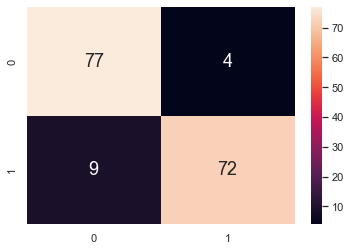

In [23]:
VAR_b = p.DataFrame(y[['ALCOHOL CONSUMING','ALLERGY ','SWALLOWING DIFFICULTY','COUGHING','WHEEZING','PEER_PRESSURE','ANXIETY']])   
LC_b = p.DataFrame(y['LUNG_CANCER'])         

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(VAR_b, LC_b, test_size = 0.3,random_state=4)

model_b = LogisticRegression()
model_b.fit(X_train_b,y_train_b)

y_pred_b=model_b.predict(X_test_b)
q_b=accuracy_score(y_test_b,y_pred_b)
print("Accuracy of model : ",q_b)

f = plt.plot(figsize=(12, 4))
s.heatmap(confusion_matrix(y_test_b, y_pred_b), 
            annot = True, fmt=".0f", annot_kws={"size": 18},)
conf_matrix = confusion_matrix(y_test_b, y_pred_b)

Model_b=confusion_matrix(y_test_b, y_pred_b)
TP_b=Model_b[1,1]

FP_b=Model_b[1,0]

TN_b=Model_b[0,0]

FN_b=Model_b[0,1]

print("\nTP:",TP_b)
print("TN:",TN_b)
print("FP:",FP_b)
print("FN:",FN_b)

print("\nTrue Positive Rate:\t",TP_b/(TP_b+FN_b))

Presentation Link: https://youtu.be/kwtn6XUwJVU